<a href="https://colab.research.google.com/github/douglasbmoreira/analisando_prevendo_series_temporais/blob/main/Analisando_e_Prevendo_Series_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste estudo de caso, fomos contratados por uma empresa de aluguéis de bicicletas em Londres, para entender os padrões, e poder ajudar a compreender a demanda de bicicletas.

#Unidade 1 - Preparando e Processando os dados

In [49]:
#Importando as bibliotecas que iremos usar para fazer leitura dos dados, analises e plotagem.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#criando uma variável com os dados
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data_science_projeto/main/Dados/bicicletas.csv')
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [51]:
#Identificando os tipos de dados que temos na nossa tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [52]:
#Conhecendo o tamanho da nossa tabela
df.shape

(17429, 10)

In [53]:
#Verificando a quantidade de dados nulos que temos e onde eles estão localizados
df.isnull().sum()

,0
data_hora,0
contagem,0
temperatura,23
sensacao_termica,23
umidade,0
velocidade_vento,0
clima,0
feriado,0
fim_de_semana,0
estacao,0


In [54]:
#Interpolando os dados nulos, para que não tenhamos mais dados nulos que possam interferir nas nossas análises
df['temperatura'] = df['temperatura'].interpolate(method='linear')
df['sensacao_termica'] = df['sensacao_termica'].interpolate(method='linear')

In [55]:
#Verificando se a interpolação funcionou
df.isnull().sum()

,0
data_hora,0
contagem,0
temperatura,0
sensacao_termica,0
umidade,0
velocidade_vento,0
clima,0
feriado,0
fim_de_semana,0
estacao,0


In [56]:
#Visualizando os nosso dataframe
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [57]:
#Verificando se temos dados duplicados na nossa tabela, e somando para saber a quantidade desses temos desses dados
df.duplicated().sum()

np.int64(15)

In [58]:
#Criando uma variável para armazenar os dados duplicados, e criando um novo df sem os dados duplicados
duplicatas = df.duplicated(keep= False)
linhas_duplicatas = df[duplicatas]
linhas_duplicatas.sort_values(by='data_hora')
df_limpo = df.drop_duplicates()

In [59]:
#Verificando se funcionou a limpeza dos dados duplicados
df_limpo.duplicated().sum()

np.int64(0)

In [60]:
#Analisando o tamanho no nosso novo dataframe
df_limpo.shape

(17414, 10)

O nosso primeiro dataframe com os dados duplicados tinha 17429 linhas e 10 colunas, após a limpeza dos dados duplicados temos um novo dataframe com 17414 linhas e 10 colunas

#Unidade 2 - Explorando os dados númericos

In [61]:
#Importando as bibliotecas de visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

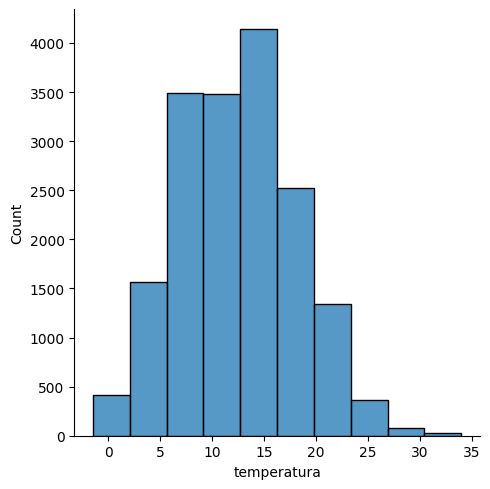

In [62]:
#Fazendo uma plotagem da temperatura vs número de bicicletas alugadas
sns.displot(df_limpo, x= 'temperatura', bins = 10)
plt.show()

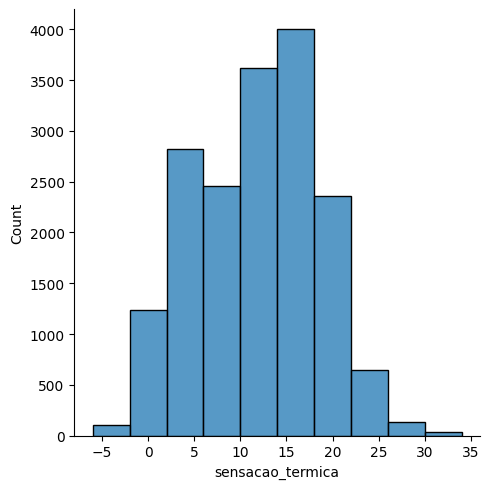

In [63]:
#Criando uma plotagem gráfica da sensação térmica vs número de bicicletas alugadas
sns.displot(df_limpo, x= 'sensacao_termica', bins = 10)
plt.show()

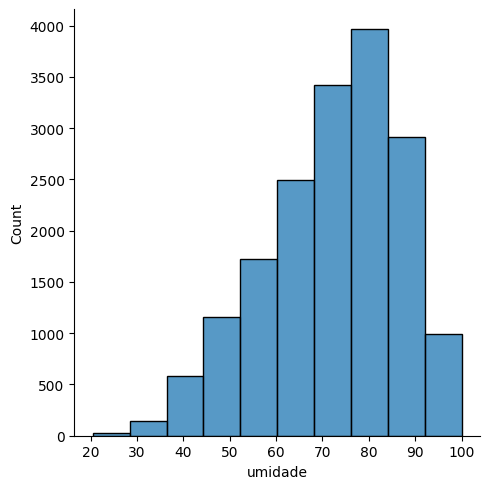

In [64]:
#Fazendo uma plotagem da umidade do ar vs número de bicicletas alugadas
sns.displot(df_limpo, x= 'umidade', bins = 10)
plt.show()

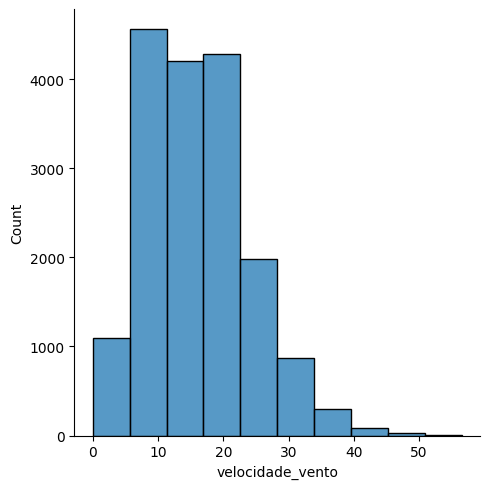

In [65]:
#Fazendo uma plotagem da velocidade do vento vs número de bicicletas alugadas
sns.displot(df_limpo, x= 'velocidade_vento', bins = 10)
plt.show()

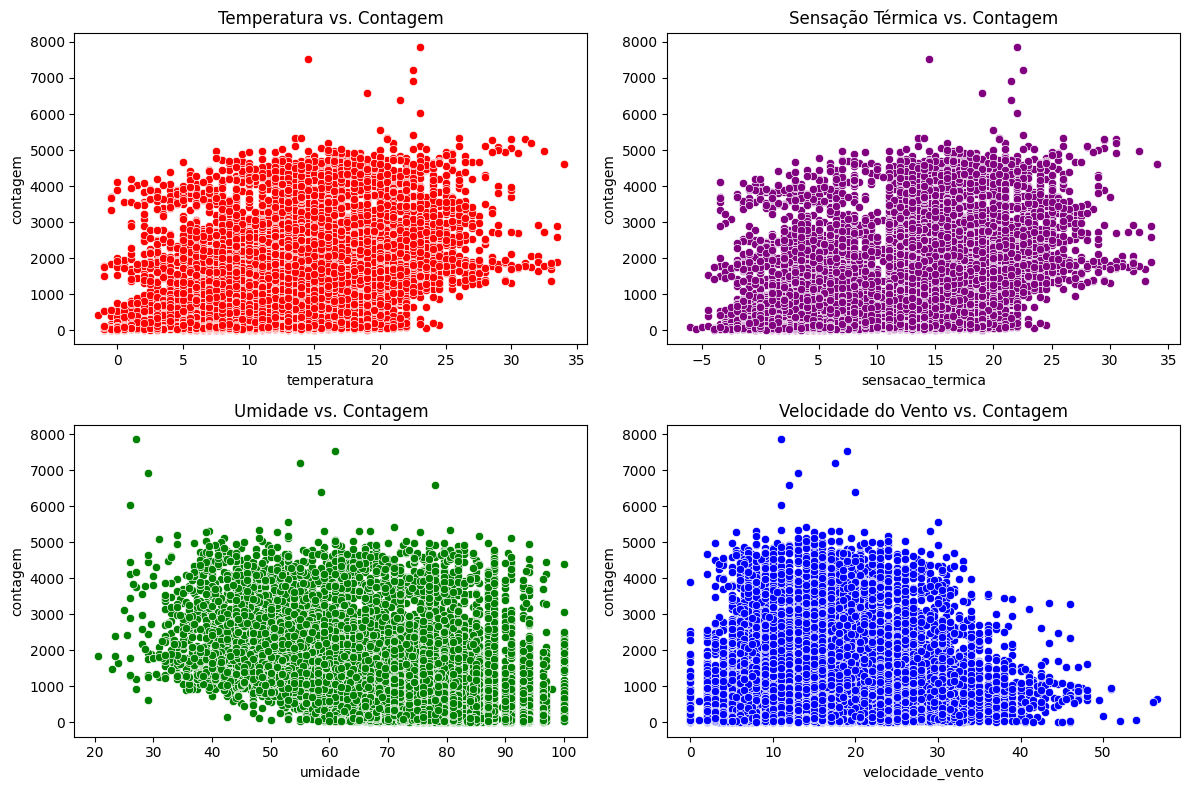

In [66]:
# prompt: crie 4 gráficos do tipo scatterplot das variáveis temperatura, sensacao_termica, umidade, velocidade_vento com a coluna contagem no eixo y. deixar os gráficos na posição 2X2. Cada gráfico deve ter um titulo.

# Criando os subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot 1: Temperatura vs. Contagem
sns.scatterplot(x='temperatura', y='contagem', data=df_limpo, ax=axes[0, 0], color= 'red')
axes[0, 0].set_title('Temperatura vs. Contagem')

# Plot 2: Sensação Térmica vs. Contagem
sns.scatterplot(x='sensacao_termica', y='contagem', data=df_limpo, ax=axes[0, 1], color= 'purple')
axes[0, 1].set_title('Sensação Térmica vs. Contagem')

# Plot 3: Umidade vs. Contagem
sns.scatterplot(x='umidade', y='contagem', data=df_limpo, ax=axes[1, 0], color= 'green')
axes[1, 0].set_title('Umidade vs. Contagem')

# Plot 4: Velocidade do Vento vs. Contagem
sns.scatterplot(x='velocidade_vento', y='contagem', data=df_limpo, ax=axes[1, 1], color='blue')
axes[1, 1].set_title('Velocidade do Vento vs. Contagem')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()


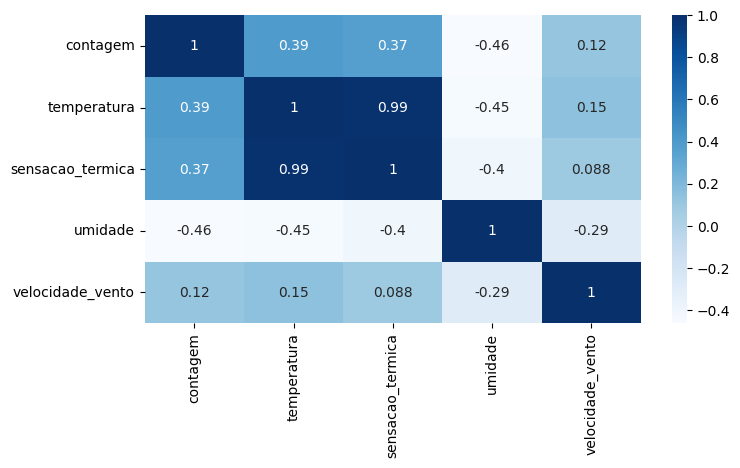

In [67]:
#Criando uma gráfico de mapa de calor para entender a relação entre os dados
plt.figure(figsize=(8, 4))
sns.heatmap(df_limpo.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

#Unidade 3 Explorando dados catégoricos

In [68]:
#Obtendo a descrição dos dados númericos
df_limpo.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2017-01-03 23:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [69]:
#Entendendo as variaveis que temos dentro de cada coluna
for col in ['clima', 'feriado', 'fim_de_semana', 'estacao']:
  print(f'Coluna: {col}')
  print(df_limpo[col].unique())
  print('='*15, '\n')

Coluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']

Coluna: feriado
['Não' 'Sim']

Coluna: fim_de_semana
['Sim' 'Não']

Coluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono']



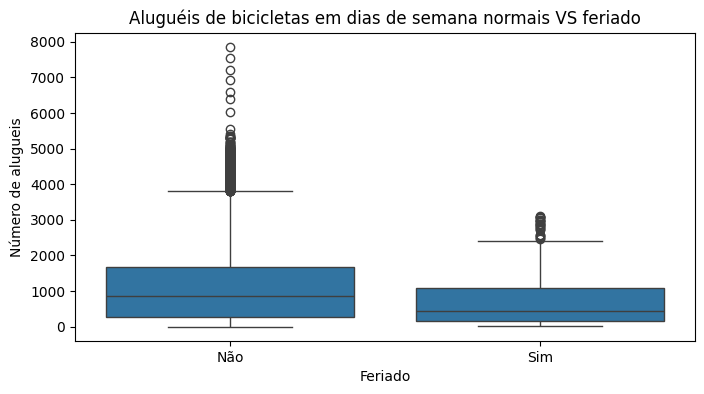

In [70]:
#criando um boxplot para entender a quantidade de bicicletas alugadas em dias da semana vs feriados
plt.figure(figsize=(8,4))
sns.boxplot(x='feriado', y='contagem', data = df_limpo)
plt.title('Aluguéis de bicicletas em dias de semana normais VS feriado')
plt.xlabel('Feriado')
plt.ylabel('Número de alugueis')
plt.show()

Podemos identificar que temos uma maior procura por alugar bicicletas em dias da semana do que em feriados

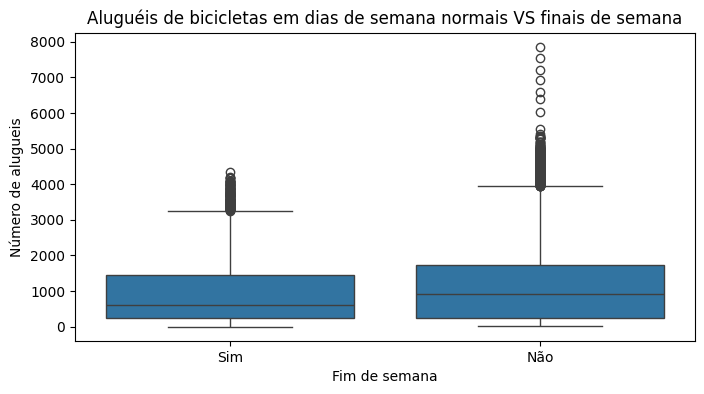

In [71]:
#criando um boxplot para entender a quantidade de bicicletas alugadas em dias da semana vs finais de semana
plt.figure(figsize=(8,4))
sns.boxplot(x='fim_de_semana', y='contagem', data = df_limpo)
plt.title('Aluguéis de bicicletas em dias de semana normais VS finais de semana')
plt.xlabel('Fim de semana')
plt.ylabel('Número de alugueis')
plt.show()

O mesmo acontece com os aluguéis no finais de semana que tem uma demanda menor do que nos dias normais da semana

In [72]:
#Puxando a mediana dos aluguéis de bicicletas de nos feriados e aos finais de semana
mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
mediana_fim_de_semana = df_limpo.groupby('fim_de_semana')['contagem'].median()

In [73]:
mediana_feriado

,contagem
feriado,
Não,855.0
Sim,439.5


In [74]:
mediana_fim_de_semana

,contagem
fim_de_semana,
Não,927.0
Sim,619.0


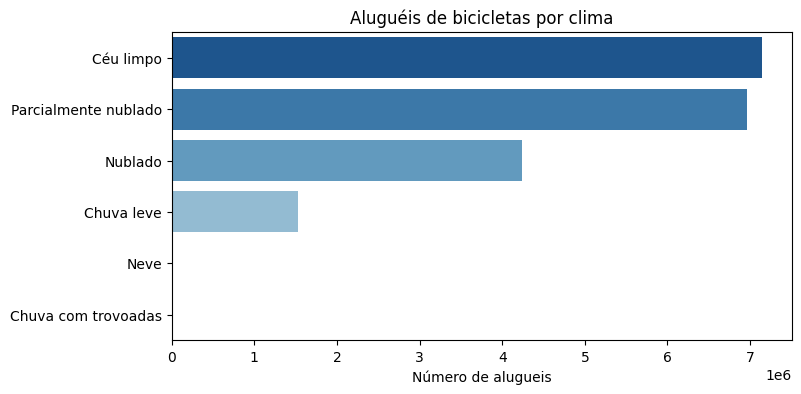

In [75]:
#Plotando um gráfico de barras horizontas para entender o quanto o clima afeta na locação de bicicletas
df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending= False)
plt.figure(figsize=(8,4))
sns.barplot(df_clima, y= 'clima', x='contagem', orient= 'h', palette= 'Blues_r', hue= 'clima')
plt.title('Aluguéis de bicicletas por clima')
plt.xlabel('Número de alugueis')
plt.ylabel('')
plt.show()

Percebemos que temos uma maior demanda em dias de céu limpo e parcialmente nublados

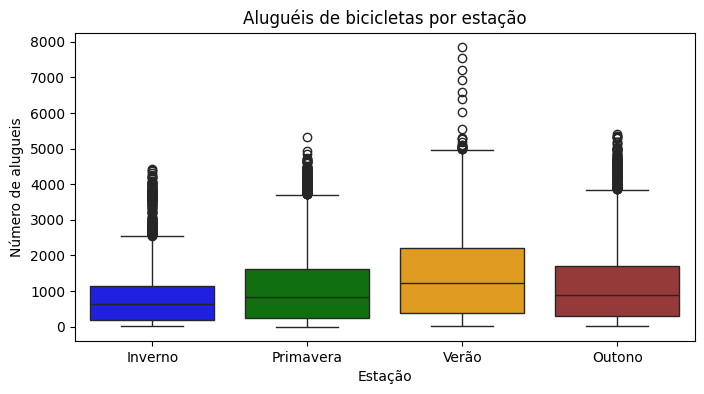

In [76]:
#Criando um boxplot da locação de bicicletas por estação do anos
plt.figure(figsize=(8,4))

#Criando uma paleta de cores para as estações do ano
paleta_cores = {'Primavera': 'green', 'Verão': 'orange', 'Outono': 'brown', 'Inverno': 'blue'}

sns.boxplot(x= 'estacao', y='contagem', data= df_limpo, palette = paleta_cores, hue= 'estacao')
plt.title('Aluguéis de bicicletas por estação')
plt.xlabel('Estação')
plt.ylabel('Número de alugueis')
plt.show()

Percebemos que a maior demanda é no verão, mas que temos demanda bem parecidas no outono e na primavera, por isso vamos puxar as medianas

In [77]:
#Obtendo as medianas das estações do ano
df_limpo.groupby('estacao')['contagem'].median()

,contagem
estacao,
Inverno,632.0
Outono,898.0
Primavera,823.0
Verão,1214.0


Vemos que o outono e a primavera tem medianas muito próximas

In [78]:
#Vamos aplicar um teste não paramétrico para entender, se podemos usar o mesmo plano de ação em ambas as estações
from scipy.stats import mannwhitneyu

primavera = df_limpo[df_limpo['estacao'] == 'Primavera']['contagem']
outono = df_limpo[df_limpo['estacao'] == 'Outono']['contagem']

stat, p = mannwhitneyu(primavera, outono)
stat, p

(np.float64(9044682.5), np.float64(0.0004762100221646296))

Obtemos um p_valor muito baixo, o que indica que não podemos adotar o mesmo plano de ação para ambas as estações

#Unidade 4 - Analisando os dados ao longo do tempo

In [79]:
#Fazendo uma copia do dataframe
df_data = df_limpo.copy()

In [80]:
#Descobrindo que tipos de dados temos
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [81]:
#Transformando os dados da coluna 'data_hora' em tipo datetime
df_data['data_hora'] = pd.to_datetime(df_data['data_hora'])

In [82]:
#Criando uma coluna mês e alocando os dados dos meses na coluna
df_data['mes'] = df_data['data_hora'].dt.month
#Criando uma coluna horário e alocando os dados de hora na coluna
df_data['horario'] = df_data['data_hora'].dt.hour

In [83]:
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [84]:
#Transformando os dados da coluna 'data_hora' em data
df_data['data_hora'] = df_data['data_hora'].dt.date

In [85]:
#Renomeando a coluna 'data_hora' em 'data'
df_data = df_data.rename(columns= {'data_hora': 'data'})
df_data.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [86]:
#verificando qual tipo de dados temos na coluna 'data'
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data              17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
 10  mes               17414 non-null  int32  
 11  horario           17414 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(5)
memory usage: 2.1+ MB


In [87]:
#Transformando os dados da coluna 'data' em formato datetime
df_data['data'] = pd.to_datetime(df_data['data'])

In [88]:
#Verificando o tipo de dados que temos
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
 10  mes               17414 non-null  int32         
 11  horario           17414 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(4)
memory usage: 2.1+ MB


In [89]:
#Criando um variável para armazenar os dados agrupados por hora, e contagem de aluguel de bicicletas somado
df_por_hora = df_data.groupby('horario')['contagem'].sum().reset_index()

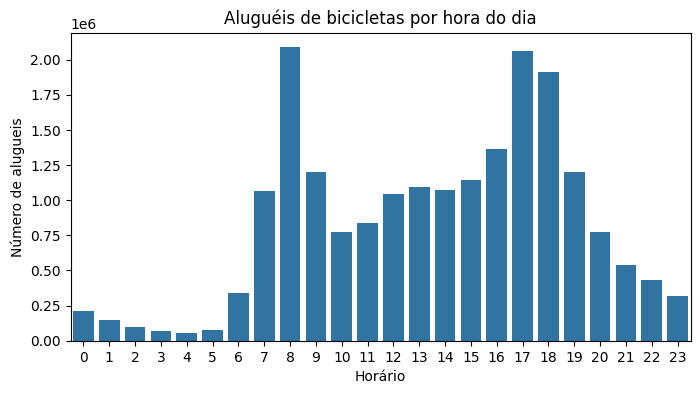

In [90]:
#Plotagem gráfica do horário do dia vs aluguel de bicicletas
plt.figure(figsize=(8,4))
sns.barplot(df_por_hora, x='horario', y='contagem')
plt.title('Aluguéis de bicicletas por hora do dia')
plt.xlabel('Horário')
plt.ylabel('Número de alugueis')
plt.show()

Observamos um pico no aluguel de nos horários das 07h, 17h e 18h.

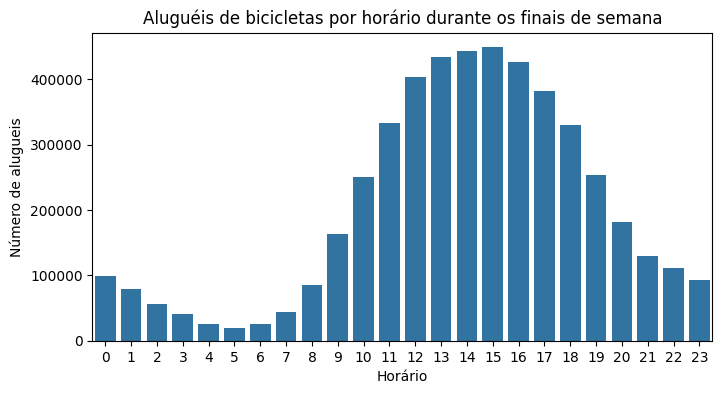

In [91]:
#Criando um df com os dados dos finais de semana, e agrupando a a contagem de bicicletas alugadas por horário
df_fim_de_semana = df_data[df_data['fim_de_semana']== 'Sim']
alugueis_fim_de_semana = df_fim_de_semana.groupby('horario')['contagem'].sum().reset_index()
#Plotando um gráfico de barras com os dados de bicicletas alugadas vs horários em finais de semana
plt.figure(figsize=(8,4))
sns.barplot(alugueis_fim_de_semana, x='horario', y='contagem')
plt.title('Aluguéis de bicicletas por horário durante os finais de semana')
plt.xlabel('Horário')
plt.ylabel('Número de alugueis')
plt.show()

Percebemos um pico no aluguel durante os finais de semana no periódo da tarde, entre as 11h até as 17h

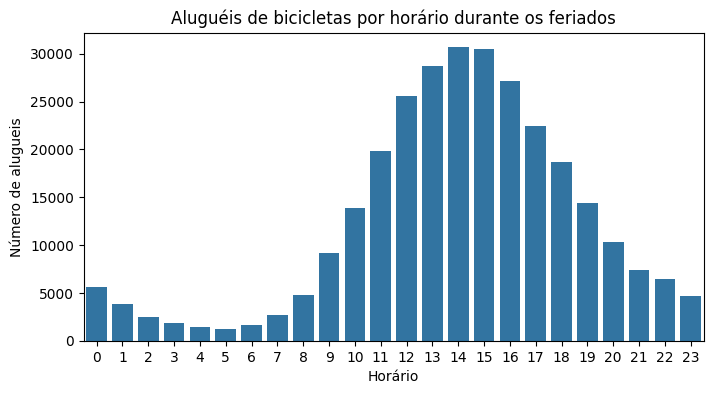

In [92]:
#Criando um df com os dados do feriado, e agrupando a a contagem de bicicletas alugadas por horário
df_feriado = df_data[df_data['feriado']== 'Sim']
alugueis_feriado = df_feriado.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(alugueis_feriado, x='horario', y='contagem')
plt.title('Aluguéis de bicicletas por horário durante os feriados')
plt.xlabel('Horário')
plt.ylabel('Número de alugueis')
plt.show()

Percebemos um pico no aluguel durante os feriados no periódo da tarde, entre as 11h até as 17h

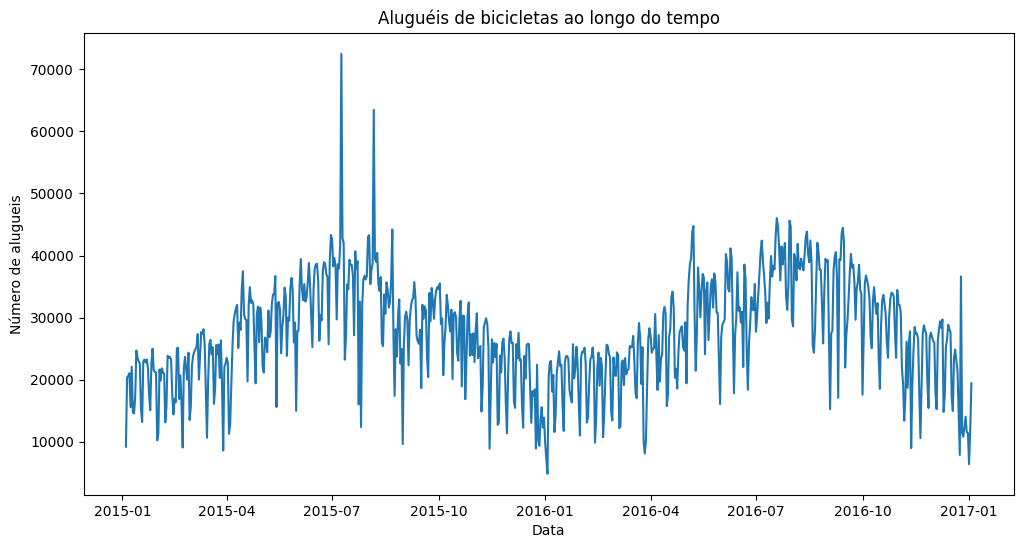

In [93]:
#Plotando um gráfico de linhas com os dados de bicicletas alugadas por dia da semana
df_tempo = df_data.groupby('data')['contagem'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(df_tempo, x='data', y='contagem')
plt.title('Aluguéis de bicicletas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Número de alugueis')
plt.show()

Analisando o gráfico é possivel observar dois picos muito altos no mês de julho de 2015, e depois em agosto do mesmo ano

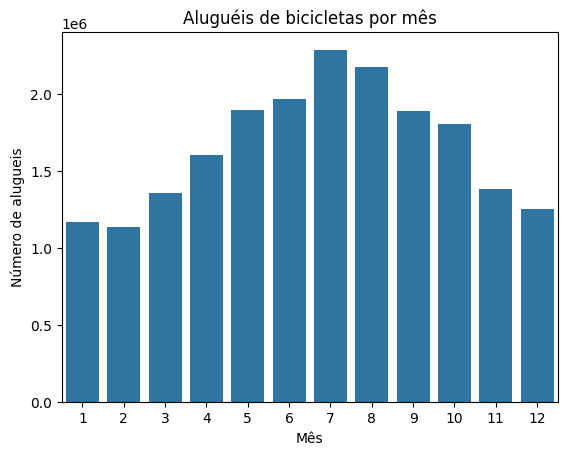

In [94]:
#Criando uma plotagem grafica com a soma dos aluguéis de bicicleta por meses do ano
alugueis_mensais = df_data.groupby('mes')['contagem'].sum().reset_index()
sns.barplot(alugueis_mensais, x='mes', y='contagem')
plt.title('Aluguéis de bicicletas por mês')
plt.xlabel('Mês')
plt.ylabel('Número de alugueis')
plt.show()

Ao analisar os dados que obtemos e olharmos o gráfico que acabamos de plotar, percebemos que o número de aluguéis de bicicleta aumenta nos meses mais quentes, que são junho, julho e agosto, meses do verão europeu, visto que estamos analisando os dados de uma empresa de Londres

##Desafio

Nesta aula, fizemos uma análise com gráficos para representar a quantidade de aluguéis de bicicletas por dia e a soma total de aluguéis para cada um dos meses do ano. Para isto, precisamos transformar o formato das datas para um formato mais adequado com o uso do datetime e, em seguida, utilizamos agrupamentos de dados para somar os aluguéis de cada horário do dia.

Agora, chegou o momento de praticar e ir mais além. Como demanda adicional, surgiu a necessidade de encontrar para cada um dos meses, a média de aluguéis diários. A partir dos dados e do que foi construído durante a aula, obtenha um gráfico de barras contendo a média de aluguéis dos dias.

Como uma dica para a construção desta tarefa, perceba que os dados estão representados em horários do dia. Primeiro é necessário agrupar os dados de cada dia e depois extrair a média de aluguel dos dias para cada mês separadamente, usando o método mean(). Você pode utilizar o método dt.to_period('M') para transformar a data para o formato mês/ano.

In [95]:
#Agrupando a contagem de aluguéis de bicicleta por dia
df_tempo = df_data.groupby('data')['contagem'].sum().reset_index()
df_tempo.head()

,data,contagem
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601


In [96]:
#Agrupando a contagem de aluguéis de bicicleta por mês
df_tempo['mes'] = df_tempo['data'].dt.to_period('M')
df_tempo.head()

,data,contagem,mes
0,2015-01-04,9234,2015-01
1,2015-01-05,20372,2015-01
2,2015-01-06,20613,2015-01
3,2015-01-07,21064,2015-01
4,2015-01-08,15601,2015-01


In [97]:
#Obtendo a quantidade de bicicletas alugadas por mês ao longos dos anos
media_aluguel_mes = df_tempo.groupby('mes')['contagem'].sum().reset_index()
media_aluguel_mes.head()

,mes,contagem
0,2015-01,546639
1,2015-02,543594
2,2015-03,695934
3,2015-04,831582
4,2015-05,895413


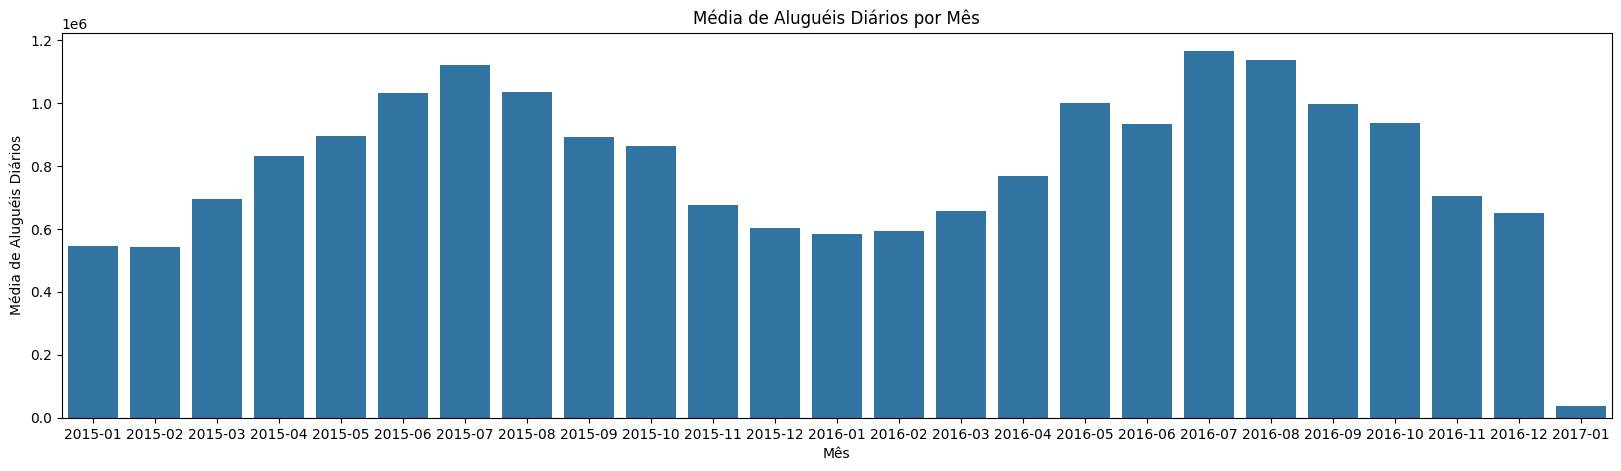

In [98]:
#Plotando um gráfico de barras que demonstra a quantidade de bicicletas alugadas ao longo dos meses e dos anos
plt.figure(figsize=(20,5))
sns.barplot(media_aluguel_mes, x='mes', y='contagem')
plt.title('Média de Aluguéis Diários por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Aluguéis Diários')
plt.show()

#Unidade 5 Construindo modelo preditivo

In [99]:
#Importando biblioteca Prophet que irá fazer uma previsão ao longo dos tempo, com base nos dados que temos
from prophet import Prophet

In [100]:
#Criando um df contendo a data e hora, e a quantidade de bicicletas alugadas, e renomeando as colunas, porque o Prophet só identifica as colunas 'ds'e 'y'
df_prophet = df_data[['data', 'contagem']].rename(columns={'data':'ds', 'contagem':'y'})
df_prophet.head()

,ds,y
0,2015-01-04,182
1,2015-01-04,138
2,2015-01-04,134
3,2015-01-04,72
4,2015-01-04,47


In [101]:
#Agrupando o número de bicicletas alugadas por dia
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet.head()

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601


In [102]:
#Importando a biblioteca Numpy para criamos uma semente aleátoria para usarmos no nosso modelo
import numpy as np
np.random.seed(4587)

#Crianos nosso modelo
modelo= Prophet()
modelo.fit(df_prophet)

#Criando um df e definindo o período de dias que queremos que o modelo preveja
futuro = modelo.make_future_dataframe(periods= 90, freq= 'D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3oy3u61a/kgmkaeha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3oy3u61a/oq_qn8up.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74694', 'data', 'file=/tmp/tmp3oy3u61a/kgmkaeha.json', 'init=/tmp/tmp3oy3u61a/oq_qn8up.json', 'output', 'file=/tmp/tmp3oy3u61a/prophet_modelxs1c6a3j/prophet_model-20250403214257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:42:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:42:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


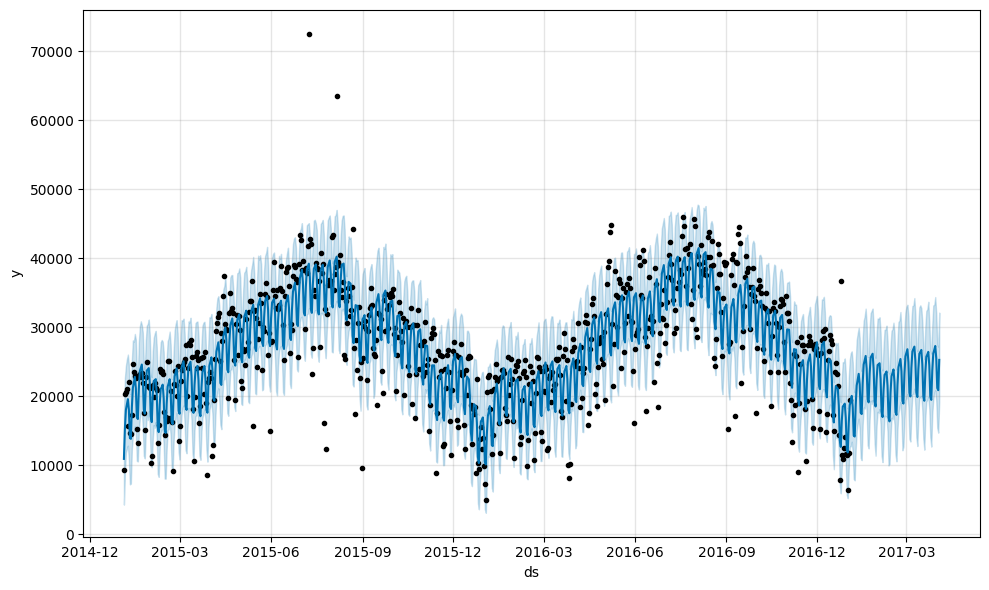

In [103]:
#Plotando a previsão
fig_1= modelo.plot(previsao)

Ao analisarmos a previsão, podemos observar que esta coerente, visto que os primeiros meses do ano temos uma baixa na quantidade de bicicletas locadas, pois estamos no inverno

In [104]:
#Selecionando os dados que mais serão relevantes para nossas analises, que são o ds, yhat, yhat_lower e yhat_upper
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,10901.148240,4272.992256,17164.501687
1,2015-01-05,15311.232708,8913.287413,22636.582586
2,2015-01-06,18014.350866,11829.942639,24414.201504
3,2015-01-07,18744.719144,12344.154062,25364.884607
4,2015-01-08,19556.191727,12809.812197,26023.639264
...,...,...,...,...
815,2017-03-30,27262.740955,20840.917738,34360.842038
816,2017-03-31,25490.750990,19305.507172,31997.954460
817,2017-04-01,21173.750109,15400.577315,27665.232260
818,2017-04-02,20856.740496,14700.917577,27176.730648


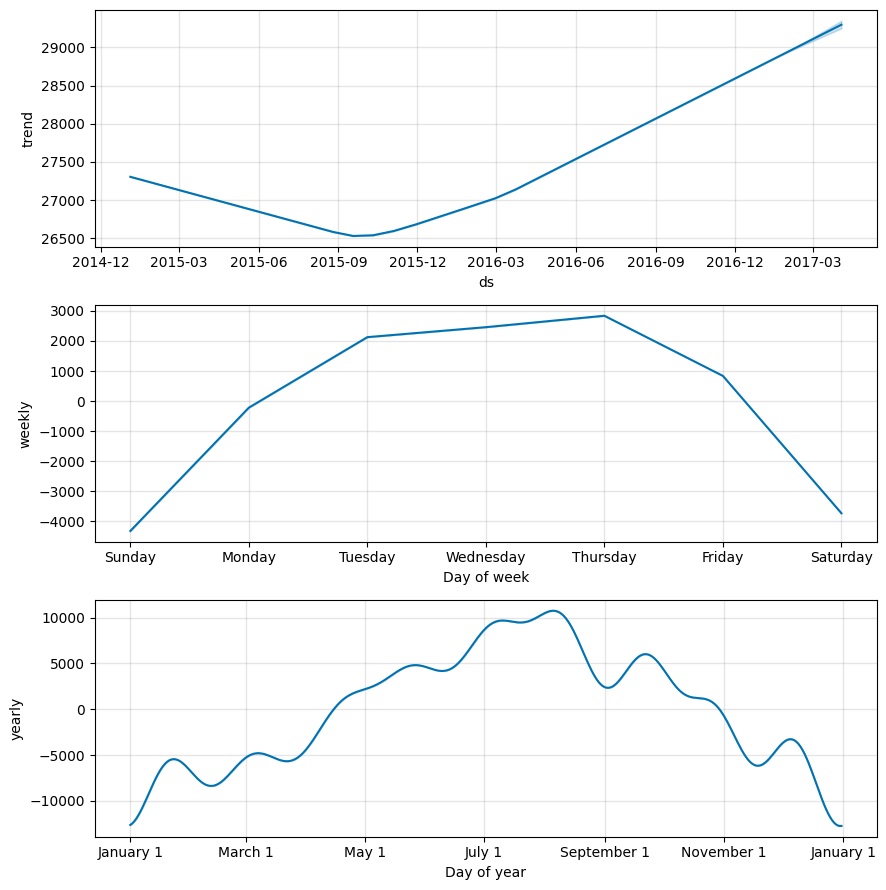

In [105]:
#Entendendo quais os compenentes que a função predict usou para fazer a previsão
fig_2 = modelo.plot_components(previsao)

In [106]:
#obtendo o tamanho do nosso df
df_prophet.shape

(730, 2)

In [107]:
#Visualizando o df
df_prophet.head()

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601


In [108]:
#Criando um df de treino para treinarmos o nosso modelo para prever os dados futuros, usaremos 80% dos dados
df_treino= pd.DataFrame()
df_treino['ds'] = df_prophet['ds'][:584]
df_treino['y'] = df_prophet['y'][:584]

In [109]:
#Criando um df de teste para treinarmos o nosso modelo para prever os dados futuros, usaremos 20% dos dados
df_teste= pd.DataFrame()
df_teste['ds'] = df_prophet['ds'][584:]
df_teste['y'] = df_prophet['y'][584:]

In [110]:
#Usando uma semente aleatória
np.random.seed(4587)
#Criando o modelo
modelo= Prophet()
modelo.fit(df_treino)
#Criando um df de previsão no periodo de 150 dias
futuro = modelo.make_future_dataframe(periods= 150, freq= 'D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3oy3u61a/t_a006lb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3oy3u61a/j_bqvb5q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78235', 'data', 'file=/tmp/tmp3oy3u61a/t_a006lb.json', 'init=/tmp/tmp3oy3u61a/j_bqvb5q.json', 'output', 'file=/tmp/tmp3oy3u61a/prophet_model5f61sbur/prophet_model-20250403214259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:42:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:42:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


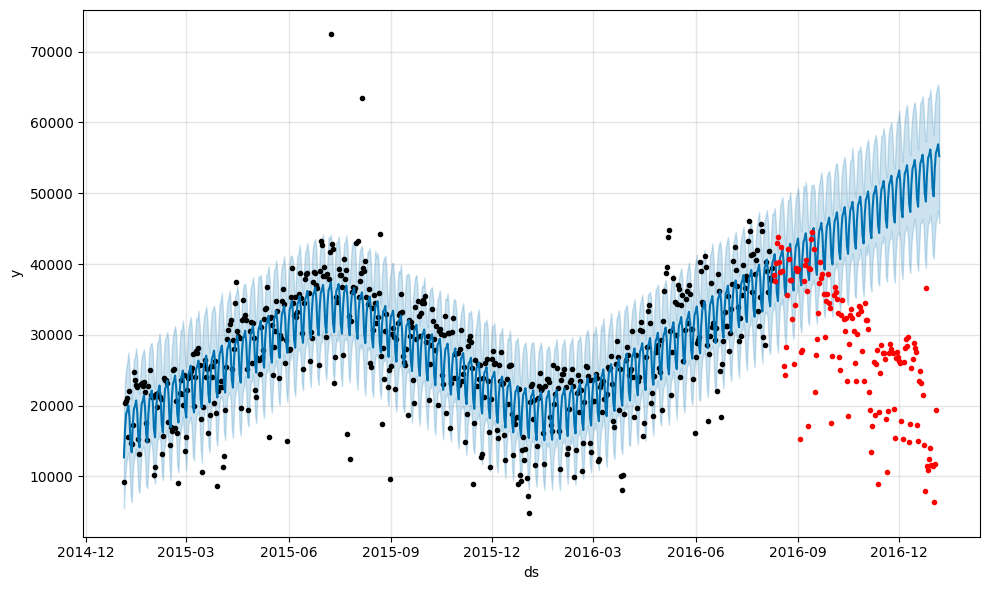

In [111]:
#Plotando a previsão no nosso modelo, e o df_teste
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

Ao analisar o gráfico da previsão, percebemos que a previsão esta errada, porque ela preve um aumento dos aluguéis nos meses do inverno, e isso ao longo das nossas análises não acontece, no inverno o número de aluguéis de bicicletas tendem a cair.

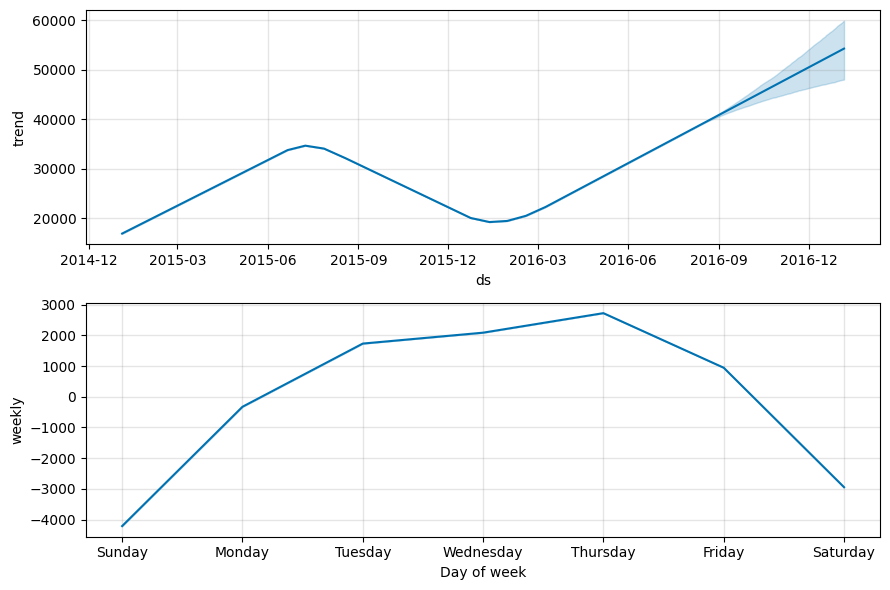

In [112]:
#Analisando os componentes que foram usados para a previsão
fig2= modelo.plot_components(previsao)

Percebemos que não foi usado o paramétro de sazonalidade para fazer essa previsão

In [113]:
#Criando um df de comparação para analisarmos o yhat e o y real, iremos unir duas planilhas atravês da coluna 'ds'
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on= 'ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,40646.666399,38430
1,2016-08-11,41387.553580,37626
2,2016-08-12,39717.735888,40159
3,2016-08-13,35936.820545,43041
4,2016-08-14,34777.785741,43848
...,...,...,...
141,2016-12-30,54505.511686,11566
142,2016-12-31,50724.596343,11424
143,2017-01-01,49565.561539,6421
144,2017-01-02,53551.536790,11823


In [114]:
#Iremos calcular o MSE e RMSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE:{rmse}')

MSE: 466132050.6184666, RMSE:21590.09149166503


Ao analisar os resultados percebemos um RMSE muito alto, o que não gera confiança para o nosso modelo

#Unidade 6 Melhorando as previsões

In [115]:
#Vamos testar o nosso modelo ativando o paramétro de sazonalidade
np.random.seed(4587)

modelo= Prophet(yearly_seasonality= True)
modelo.fit(df_treino)

futuro = modelo.make_future_dataframe(periods= 150, freq= 'D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3oy3u61a/83ck7mjj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3oy3u61a/zpru_un0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95944', 'data', 'file=/tmp/tmp3oy3u61a/83ck7mjj.json', 'init=/tmp/tmp3oy3u61a/zpru_un0.json', 'output', 'file=/tmp/tmp3oy3u61a/prophet_modelo9uhuejv/prophet_model-20250403214301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:43:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:43:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


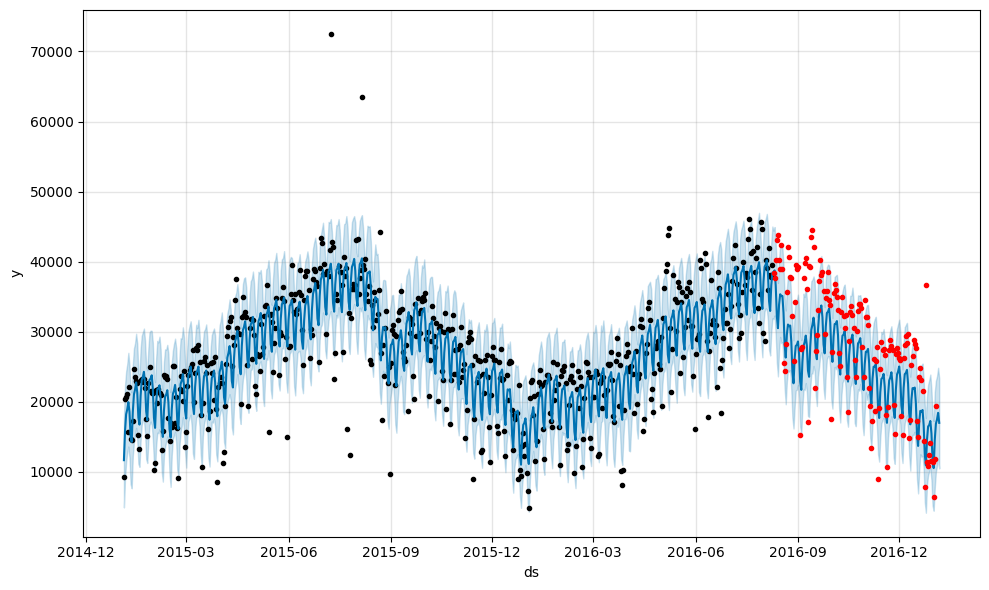

In [116]:
#Plotando a previsão no nosso modelo, e o df_teste
fig1= modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

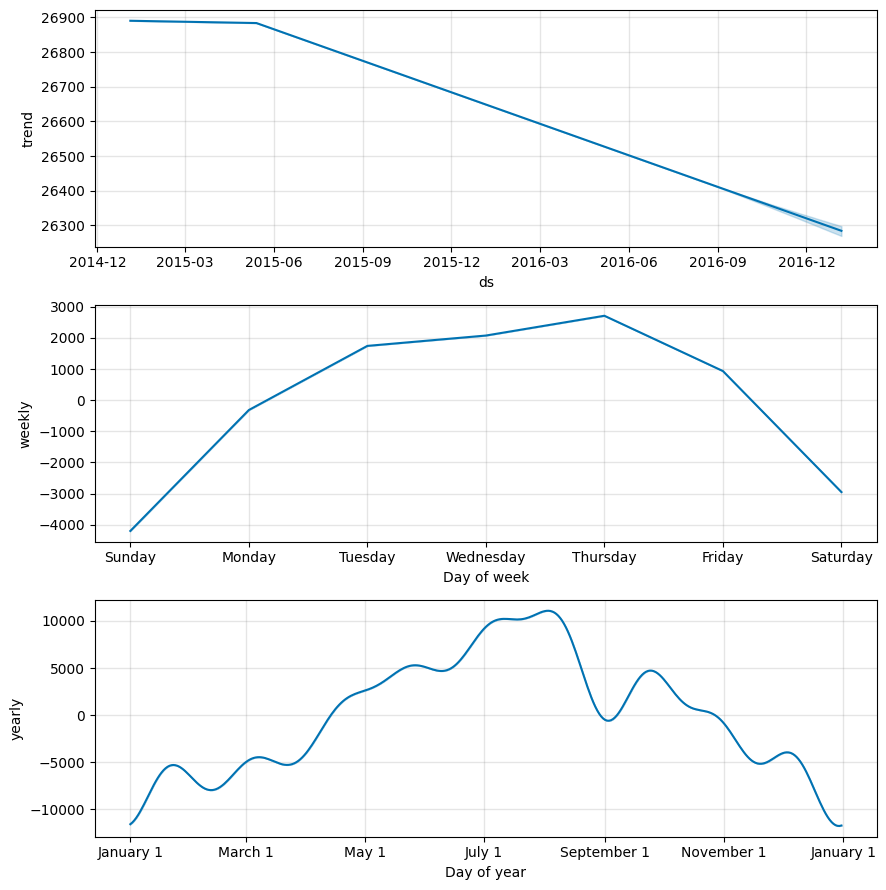

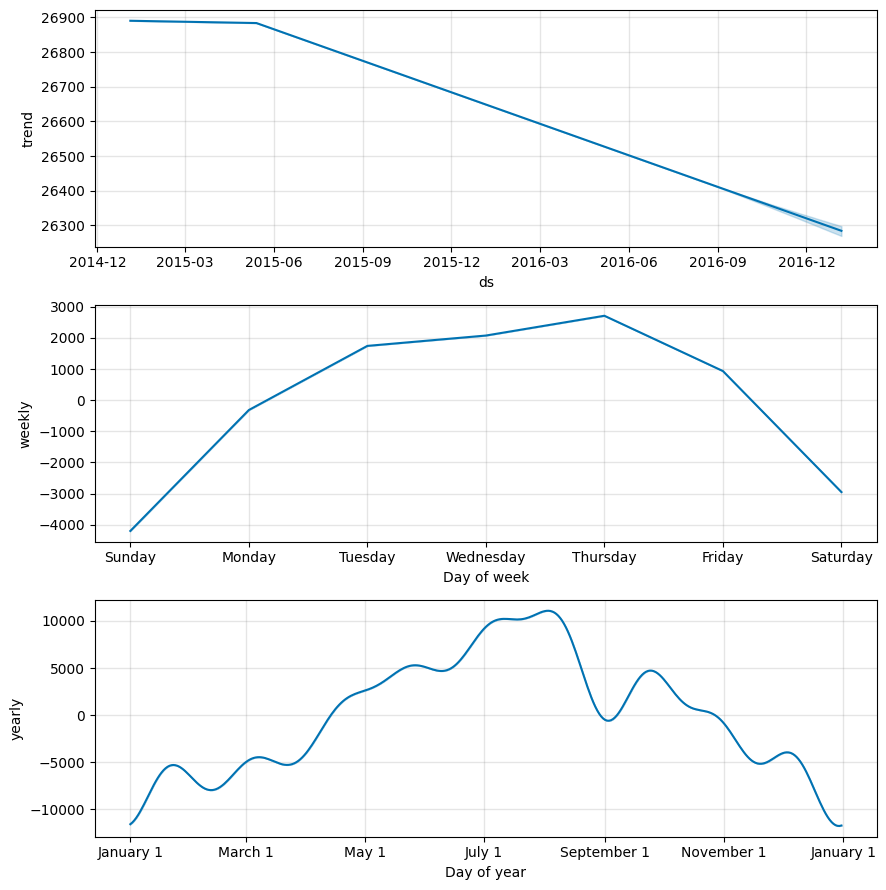

In [117]:
#Plotando os compenentes usados na previsão
modelo.plot_components(previsao)

In [118]:
#Criando um df de comparação para analisarmos a diferença entre o y real e o yhat
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on= 'ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38465.369605,38430
1,2016-08-11,38747.157010,37626
2,2016-08-12,36570.384861,40159
3,2016-08-13,32236.934232,43041
4,2016-08-14,30495.324496,43848
...,...,...,...
141,2016-12-30,15472.686807,11566
142,2016-12-31,11648.789994,11424
143,2017-01-01,10517.646095,6421
144,2017-01-02,14573.011741,11823


In [119]:
#Calculando o MSE e o RMSE para verificar o grau de confiabilidade do nosso modelo
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE:{rmse}')

MSE: 38623883.499975376, RMSE:6214.8116222437


Podemos perceber que houve uma diminuição considerável no valor do RMSE

In [120]:
#Criando um df futuro para obter os yhat_lower e yhat_upper
np.random.seed(4587)

modelo= Prophet()
modelo.fit(df_prophet)

futuro = modelo.make_future_dataframe(periods= 0)
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3oy3u61a/9yp5snm5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3oy3u61a/b9spg64d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62698', 'data', 'file=/tmp/tmp3oy3u61a/9yp5snm5.json', 'init=/tmp/tmp3oy3u61a/b9spg64d.json', 'output', 'file=/tmp/tmp3oy3u61a/prophet_modelbs1wub4k/prophet_model-20250403214303.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:43:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:43:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [121]:
#Criando um df sem outliers
sem_outliers = df_prophet[(df_prophet['y'] > previsao['yhat_lower']) & (df_prophet['y'] < previsao['yhat_upper'])]
sem_outliers

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [122]:
#Criando um df de treino sem os valores outliers
df_treino = pd.DataFrame()
df_treino['ds'] = sem_outliers['ds'][:505]
df_treino['y'] = sem_outliers['y'][:505]

In [123]:
#Criando um df de teste sem os valores outliers
df_teste= pd.DataFrame()
df_teste['ds'] = sem_outliers['ds'][505:]
df_teste['y'] = sem_outliers['y'][505:]

In [124]:
#Gerando um modelo de previsão sem os valores outliers para um periodo de 150 dias
np.random.seed(4587)

modelo_sem_outliers= Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino)

futuro = modelo_sem_outliers.make_future_dataframe(periods= 150, freq= 'D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3oy3u61a/vcuuybel.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3oy3u61a/jdyitp64.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53321', 'data', 'file=/tmp/tmp3oy3u61a/vcuuybel.json', 'init=/tmp/tmp3oy3u61a/jdyitp64.json', 'output', 'file=/tmp/tmp3oy3u61a/prophet_model195l7v0y/prophet_model-20250403214304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:43:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:43:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


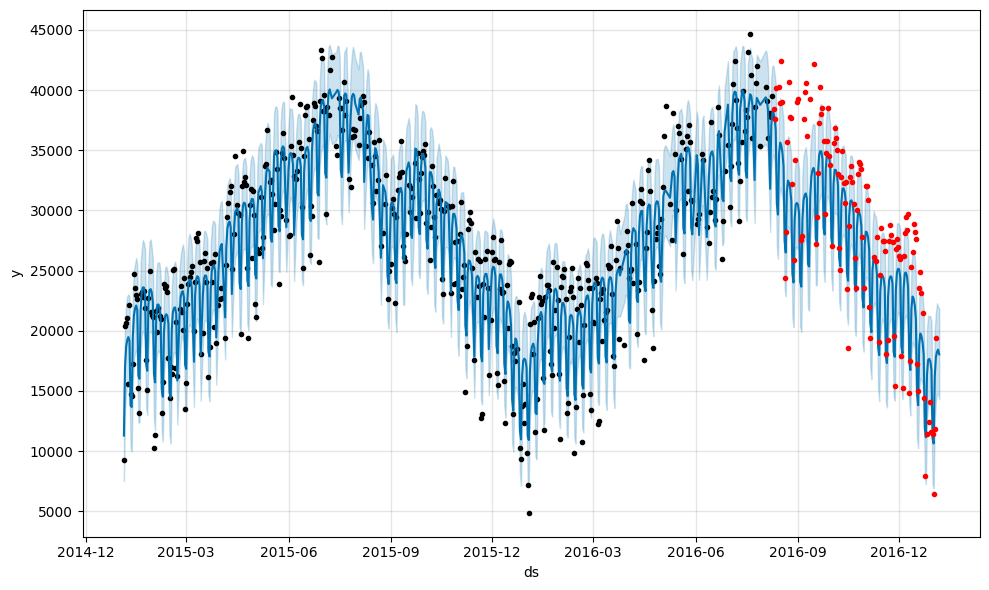

In [125]:
#Fazendo a plotagem do modelo de previsão
fig1= modelo_sem_outliers.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

Podemos analisar que há uma coerência entre a previsão e os dados que já analisarmos

In [126]:
#Criando um df de comparação
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on= 'ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38124.205916,38430
1,2016-08-11,37708.703632,37626
2,2016-08-12,36664.046726,40159
3,2016-08-15,34692.056037,40236
4,2016-08-16,35633.113613,38911
...,...,...,...
121,2016-12-30,16752.064183,11566
122,2016-12-31,11045.380016,11424
123,2017-01-01,10626.497538,6421
124,2017-01-02,16230.512446,11823


In [ ]:
#Calculando o MSE e RMSE
mse= mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE:{rmse}')

MSE: 15672925.764235971, RMSE:3958.904616713564


Podemos observar que sem os valores outliers diminui ainda mais o valor de RMSE, o que gera uma maior confiabilidade para o nosso modelo

In [ ]:
#Fazendo a plotagem de um gráfico interativo do modelo com o Plotly da bibilioteca Prophet
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(modelo, previsao)

In [ ]:
#Plotando os compenentes usados pelo modelo para gerar a previsão
plot_components_plotly(modelo, previsao)

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [ ]:
#Gerando uma previsão para 365 dias
np.random.seed(4587)

modelo_sem_outliers= Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino)

futuro = modelo_sem_outliers.make_future_dataframe(periods= 365, freq= 'D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjbm7xsyf/a820iz4n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjbm7xsyf/pn0cttto.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61506', 'data', 'file=/tmp/tmpjbm7xsyf/a820iz4n.json', 'init=/tmp/tmpjbm7xsyf/pn0cttto.json', 'output', 'file=/tmp/tmpjbm7xsyf/prophet_model7iruw01d/prophet_model-20250331202523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:25:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:25:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Plotando o modelo de previsão
from prophet.plot import plot_plotly, plot_components_plotly
fig = plot_plotly(modelo_sem_outliers, previsao)
fig.show()